Integrar el dataframe de canciones y artistas de spotify con una columna con todos los generos

In [1]:
import re
import pandas as pd
df_completo = pd.read_csv("data_genres_pre_2024.csv")
df_spotify = pd.read_csv("spotify_artists_genres_11.csv") # añadir aquí los géneros de spotify cuando los tengamos
df_spotify

,name_artist,gen_artist
0,Sergio Marini & Luke,['Faltante']
1,Makiko,['Faltante']
2,Naushad,['malayalam pop']
3,S27,['Faltante']
4,Emil Lundin,['Faltante']
...,...,...
31951,Cri-Cri,"['reggaeton chileno', 'chilean trap', 'chilean..."
31952,Rogelio Martinez El Rm,"['corrido', 'corridos bélicos', 'banda']"
31953,Good Rockin Charles,"['blues', 'classic blues']"
31954,Trin-I-Tee 5:7,"['gospel', 'gospel r&b', 'worship']"


In [13]:
df_completo['genres_artists'] = ""
df_completo['artists_aux'] = df_completo['artists'].str.lower()
df_spotify["artist_aux"] = df_spotify["name_artist"].str.lower()
df_completo

,artists,name,genres,genres_artists,artists_aux
0,Olivia Rodrigo,drivers license,"pop, bedroom pop, sad, 2021, Ballad",,olivia rodrigo
1,Ariana Grande,positions,"pop, rnb, 2020, 2020s, trap",,ariana grande
2,"24kGoldn, iann dior",Mood (feat. iann dior),"pop, rap, pop rap, 2020, 2020s",,"24kgoldn, iann dior"
3,"Bad Bunny, Jhay Cortez",DÁKITI,"rnb, latin, 2020s, rap, ambient pop",,"bad bunny, jhay cortez"
4,KAROL G,BICHOTA,"Reggaeton, latin, 2020, 2020s, Karol G",,karol g
...,...,...,...,...,...
157679,"Georgette Heyer, Irina Salkow",Kapitel 174 - Der Page und die Herzogin,Unknown,,"georgette heyer, irina salkow"
157680,Aschberger Saitenmusi,Weissach Boarisch,Unknown,,aschberger saitenmusi
157681,Carmen Miranda,Amor Ideal,Unknown,,carmen miranda
157682,Carlos Gardel,Alma de loca,tango,,carlos gardel


In [ ]:
for index, row in df_completo.iterrows():
    artists = str(row['artists_aux']).split(",  ")
    genres_sp_list = []
    for artist in artists:
        if artist in df_spotify["artist_aux"].values:
            index_spotify = df_spotify[df_spotify["artist_aux"] == artist].index[0]
            genres_sp = df_spotify.at[index_spotify, "gen_artist"]
            genres_sp_list.append(genres_sp)
            
    df_completo.at[index, 'genres_artists'] =  genres_sp_list

df_completo 
# 30 min ejecucion

,artists,name,genres,genres_artists,artists_aux
0,Olivia Rodrigo,drivers license,"pop, bedroom pop, sad, 2021, Ballad",[['Faltante']],olivia rodrigo
1,Ariana Grande,positions,"pop, rnb, 2020, 2020s, trap",[['pop']],ariana grande
2,"24kGoldn, iann dior",Mood (feat. iann dior),"pop, rap, pop rap, 2020, 2020s","[['Faltante'], ['melodic rap']]","24kgoldn, iann dior"
3,"Bad Bunny, Jhay Cortez",DÁKITI,"rnb, latin, 2020s, rap, ambient pop","[['reggaeton', 'trap latino', 'latin', 'urbano...","bad bunny, jhay cortez"
4,KAROL G,BICHOTA,"Reggaeton, latin, 2020, 2020s, Karol G","[['reggaeton', 'latin', 'urbano latino']]",karol g
...,...,...,...,...,...
157679,"Georgette Heyer, Irina Salkow",Kapitel 174 - Der Page und die Herzogin,Unknown,"[['Faltante'], ['Faltante']]","georgette heyer, irina salkow"
157680,Aschberger Saitenmusi,Weissach Boarisch,Unknown,[['Faltante']],aschberger saitenmusi
157681,Carmen Miranda,Amor Ideal,Unknown,"[['exotica', 'samba']]",carmen miranda
157682,Carlos Gardel,Alma de loca,tango,"[['tango', 'bolero']]",carlos gardel


In [ ]:
#df_completo.to_csv("checked_song_and_artists_genres.csv", index=False)

Trabajar con el dataframe que contiene generos de artistas y de canciones en genres

In [38]:
import pandas as pd
df_completo = pd.read_csv("canciones_generos_2024_2025.csv")
df_completo.rename(columns={'gen_artist': 'genres_artists'}, inplace=True)
df_completo['genres_from_artists'] = 0
df_completo
df_completo = df_completo.dropna(subset=['artist_name'])

df_genres_nan = df_completo[df_completo['genres'].isna()]
df_genres_nan = df_genres_nan[df_genres_nan['genres_artists'] == '[]']

df_completo = df_completo[~df_completo['track_id'].isin(df_genres_nan['track_id'])] # quitar canciones sin género

df_completo['genres'].fillna('Unknown', inplace=True)
df_completo



C:\Users\Carlos\AppData\Local\Temp\ipykernel_52056\2727496039.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_completo['genres'].fillna('Unknown', inplace=True)


,track_id,track_name,artist_name,new_popularity_2025,album,popularity_2024,duration_ms,explicit,release_date,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres,genres_artists,genres_from_artists
0,3Vj8RQkFwOmDvUrwu6MtQZ,"Yo Love - From ""Queen & Slim: The Soundtrack""",Vince Staples,55,"Yo Love (From ""Queen & Slim: The Soundtrack"")",62,143830,True,2019-11-11,0.703,...,1,0.0724,0.5650,0.000003,0.0987,0.491,147.038,Unknown,[],0
1,5jEtmndo1eO9yoKVSHvMpz,Hospedaje,Sebas,23,Hospedaje,26,208500,False,2019-11-08,0.747,...,0,0.1130,0.0617,0.000038,0.3070,0.557,180.074,"pop, latino",['classical'],0
2,1YP7UWFugY2xRX3PdieTAs,Himno de Fe y Alegría,Jairo y Su Barra Roja,26,Homenaje Musical al Fútbol: Selección Colombia,22,344733,False,2015-06-23,0.859,...,1,0.0423,0.0396,0.016000,0.2710,0.851,109.759,Unknown,[],0
3,1jt2raacDSDXbyN9o7NWcl,Qué Bien Te Ves,Kexxy Pardo,11,Qué Bien Te Ves,12,200816,False,2019-11-07,0.769,...,1,0.1170,0.2420,0.001650,0.1560,0.765,98.003,Unknown,[],0
4,2TDgoPhthPcoy1mYcQxS8P,Lambaláda,Bert and Friends,0,Supr,0,220041,False,2019-11-10,0.719,...,0,0.0325,0.3930,0.021800,0.2430,0.367,116.999,Unknown,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198121,4EdKJoJqBr73rA7aqrdBA5,Diz,Gabriela Rocha,54,Diz,57,275306,False,2019-11-07,0.481,...,0,0.0260,0.5940,0.000005,0.1130,0.171,73.989,Unknown,[],0
198122,3jdRcpohkvbG7WPo3mjiZD,Cross the Line,Dubioza kolektiv,21,Cross the Line,23,238064,False,2019-11-05,0.620,...,1,0.0306,0.1860,0.000010,0.2520,0.965,123.977,Unknown,[],0
198123,0RMmzG0f5szIxC49oucu8w,Picasso (feat. Gunna),Leeky Bandz,19,Picasso (feat. Gunna),23,192000,True,2019-11-08,0.820,...,1,0.1590,0.1070,0.000000,0.1120,0.127,140.003,Unknown,['unchecked'],0
198124,3V0nnQhqvbE3JmiDdnzQFQ,July (feat. Leon Bridges),Noah Cyrus,68,July (feat. Leon Bridges),74,152280,False,2019-11-08,0.708,...,0,0.0424,0.8530,0.000000,0.1310,0.362,72.500,"indie pop, intricate melodic phrasing, extensi...",[],0


In [39]:
import re
df_completo['main_genre'] = ""
df_completo['subgenre_1'] = ""
df_completo['subgenre_2'] = ""

for row in df_completo.itertuples():
    generos = row.genres.split(", ")
    filtrado = []
    for gen in generos:
        gen = gen.lower()
        if (gen in filtrado) or (gen in row.artist_name.lower()) or (gen in ["faltante","","vugube62", "title is a full sentence","names", "british i like", "j cole", "somafm", "tantotempotaste","myspotigrambot", "gilles peterson", "paul chambers", "like", "new york"]):
            gen = ""
        else:
            filtrado.append(gen)

    df_completo.at[row.Index, 'genres'] = ", ".join(filtrado)


diccionario_recuento_gen = {}
for index, row in df_completo.iterrows():
    lista_genres = row["genres"].lower().split(", ")
    for genre in lista_genres:
        if genre in diccionario_recuento_gen:
            diccionario_recuento_gen[genre] += 1
        else:
            diccionario_recuento_gen[genre] = 1

sorted_genres = sorted(diccionario_recuento_gen.items(), key=lambda item: item[1], reverse=True)


for row in df_completo.itertuples():
    generos = row.genres.split(", ")
    filtrado = []
    for gen in generos:
        if (diccionario_recuento_gen[gen.lower()] < 61) or (re.match(r'\d{4,}|\d+s|-?\d+', gen)) :
            gen = ""
        else:
            filtrado.append(gen)

    df_completo.at[row.Index, 'genres'] = ", ".join(filtrado)

In [40]:
df_completo

,track_id,track_name,artist_name,new_popularity_2025,album,popularity_2024,duration_ms,explicit,release_date,danceability,...,instrumentalness,liveness,valence,tempo,genres,genres_artists,genres_from_artists,main_genre,subgenre_1,subgenre_2
0,3Vj8RQkFwOmDvUrwu6MtQZ,"Yo Love - From ""Queen & Slim: The Soundtrack""",Vince Staples,55,"Yo Love (From ""Queen & Slim: The Soundtrack"")",62,143830,True,2019-11-11,0.703,...,0.000003,0.0987,0.491,147.038,unknown,[],0,,,
1,5jEtmndo1eO9yoKVSHvMpz,Hospedaje,Sebas,23,Hospedaje,26,208500,False,2019-11-08,0.747,...,0.000038,0.3070,0.557,180.074,"pop, latino",['classical'],0,,,
2,1YP7UWFugY2xRX3PdieTAs,Himno de Fe y Alegría,Jairo y Su Barra Roja,26,Homenaje Musical al Fútbol: Selección Colombia,22,344733,False,2015-06-23,0.859,...,0.016000,0.2710,0.851,109.759,unknown,[],0,,,
3,1jt2raacDSDXbyN9o7NWcl,Qué Bien Te Ves,Kexxy Pardo,11,Qué Bien Te Ves,12,200816,False,2019-11-07,0.769,...,0.001650,0.1560,0.765,98.003,unknown,[],0,,,
4,2TDgoPhthPcoy1mYcQxS8P,Lambaláda,Bert and Friends,0,Supr,0,220041,False,2019-11-10,0.719,...,0.021800,0.2430,0.367,116.999,unknown,[],0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198121,4EdKJoJqBr73rA7aqrdBA5,Diz,Gabriela Rocha,54,Diz,57,275306,False,2019-11-07,0.481,...,0.000005,0.1130,0.171,73.989,unknown,[],0,,,
198122,3jdRcpohkvbG7WPo3mjiZD,Cross the Line,Dubioza kolektiv,21,Cross the Line,23,238064,False,2019-11-05,0.620,...,0.000010,0.2520,0.965,123.977,unknown,[],0,,,
198123,0RMmzG0f5szIxC49oucu8w,Picasso (feat. Gunna),Leeky Bandz,19,Picasso (feat. Gunna),23,192000,True,2019-11-08,0.820,...,0.000000,0.1120,0.127,140.003,unknown,['unchecked'],0,,,
198124,3V0nnQhqvbE3JmiDdnzQFQ,July (feat. Leon Bridges),Noah Cyrus,68,July (feat. Leon Bridges),74,152280,False,2019-11-08,0.708,...,0.000000,0.1310,0.362,72.500,"indie pop, extensive vamping",[],0,,,


In [41]:
import ast

c = "[[\"gatos\"], [\"negro\", \"blanco\"]]"
print(type(df_completo.iloc[1].genres_artists))
print(ast.literal_eval(df_completo.iloc[1].genres_artists)[0])

d = ast.literal_eval(c)
d[0]

<class 'str'>
classical


['gatos']

In [42]:
# Filtrar los casos donde genres_artists tiene más de un "[" y más de un "]"
df_filtered = df_completo[df_completo['genres_artists'].apply(lambda x: x.count('[') > 1 and x.count(']') > 1)]
df_filtered

,track_id,track_name,artist_name,new_popularity_2025,album,popularity_2024,duration_ms,explicit,release_date,danceability,...,instrumentalness,liveness,valence,tempo,genres,genres_artists,genres_from_artists,main_genre,subgenre_1,subgenre_2


In [43]:
import ast
from collections import Counter

def parse_genres(genre_str):
    try:
        # Convertir el string en una lista real
        genres_list = ast.literal_eval(genre_str)
        # Convertir cada string de lista en una lista real
        
        #parsed_genres = [ast.literal_eval(artist_genres) for artist_genres in genres_list]
        return [genres_list]
    except (ValueError, SyntaxError):
        return []

# Aplicamos la función a la columna
df_completo["parsed_genres_artists"] = df_completo["genres_artists"].apply(parse_genres)

# Contar la frecuencia de cada género
genre_counter_artists = Counter()
for genre_lists in df_completo["parsed_genres_artists"]:
    for artist_genres in genre_lists:
        genre_counter_artists.update(artist_genres)



In [ ]:
genre_counter_artists

Counter({'unchecked': 13856,
         'c-pop': 1441,
         'mandopop': 1435,
         'taiwanese pop': 1227,
         'j-pop': 1175,
         'finnish pop': 1094,
         'turkish pop': 984,
         't-pop': 841,
         'thai pop': 840,
         'mizrahi': 715,
         'v-pop': 714,
         'chinese indie': 674,
         'norwegian pop': 662,
         'german hip hop': 652,
         'finnish rock': 642,
         'opm': 641,
         'finnish hip hop': 637,
         'iskelmä': 634,
         'turkish hip hop': 618,
         'cumbia': 607,
         'italian trap': 593,
         'j-rock': 559,
         'anime': 555,
         'christmas': 521,
         'indonesian pop': 515,
         'malay': 512,
         'grime': 510,
         'taiwanese indie': 507,
         'chinese r&b': 499,
         'drill': 493,
         'reggaeton': 488,
         'japanese indie': 476,
         'arabic rap': 446,
         'classical': 428,
         'french pop': 426,
         'metal': 422,
         'k-pop'

In [55]:
#df_completo2 = df_completo.copy()
df_completo2
df_completo = df_completo2.copy()
df_completo

,track_id,track_name,artist_name,new_popularity_2025,album,popularity_2024,duration_ms,explicit,release_date,danceability,...,liveness,valence,tempo,genres,genres_artists,genres_from_artists,main_genre,subgenre_1,subgenre_2,parsed_genres_artists
0,3Vj8RQkFwOmDvUrwu6MtQZ,"Yo Love - From ""Queen & Slim: The Soundtrack""",Vince Staples,55,"Yo Love (From ""Queen & Slim: The Soundtrack"")",62,143830,True,2019-11-11,0.703,...,0.0987,0.491,147.038,unknown,[],0,,,,[[]]
1,5jEtmndo1eO9yoKVSHvMpz,Hospedaje,Sebas,23,Hospedaje,26,208500,False,2019-11-08,0.747,...,0.3070,0.557,180.074,"pop, latino",['classical'],0,,,,[[classical]]
2,1YP7UWFugY2xRX3PdieTAs,Himno de Fe y Alegría,Jairo y Su Barra Roja,26,Homenaje Musical al Fútbol: Selección Colombia,22,344733,False,2015-06-23,0.859,...,0.2710,0.851,109.759,unknown,[],0,,,,[[]]
3,1jt2raacDSDXbyN9o7NWcl,Qué Bien Te Ves,Kexxy Pardo,11,Qué Bien Te Ves,12,200816,False,2019-11-07,0.769,...,0.1560,0.765,98.003,unknown,[],0,,,,[[]]
4,2TDgoPhthPcoy1mYcQxS8P,Lambaláda,Bert and Friends,0,Supr,0,220041,False,2019-11-10,0.719,...,0.2430,0.367,116.999,unknown,[],0,,,,[[]]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198121,4EdKJoJqBr73rA7aqrdBA5,Diz,Gabriela Rocha,54,Diz,57,275306,False,2019-11-07,0.481,...,0.1130,0.171,73.989,unknown,[],0,,,,[[]]
198122,3jdRcpohkvbG7WPo3mjiZD,Cross the Line,Dubioza kolektiv,21,Cross the Line,23,238064,False,2019-11-05,0.620,...,0.2520,0.965,123.977,unknown,[],0,,,,[[]]
198123,0RMmzG0f5szIxC49oucu8w,Picasso (feat. Gunna),Leeky Bandz,19,Picasso (feat. Gunna),23,192000,True,2019-11-08,0.820,...,0.1120,0.127,140.003,unknown,['unchecked'],0,,,,[[unchecked]]
198124,3V0nnQhqvbE3JmiDdnzQFQ,July (feat. Leon Bridges),Noah Cyrus,68,July (feat. Leon Bridges),74,152280,False,2019-11-08,0.708,...,0.1310,0.362,72.500,"indie pop, extensive vamping",[],0,,,,[[]]


In [ ]:
def assign_most_frequent_genres(row, genre_counter):
    if row["genres"] != "unknown":
        return row["genres"], 0  # Si ya tiene género, lo dejamos igual

    artist_genres_list = (row["parsed_genres_artists"])  # Lista de géneros por artista
    final_genres = []  # Lista para almacenar el género más frecuente por artista
    for artist_genres in artist_genres_list:
        # Filtramos para excluir "Faltante"
        valid_genres = [genre for genre in artist_genres if (genre != "faltante" and genre != "unchecked")]
        if valid_genres:
            # Encontramos el género más frecuente del artista
            most_frequent_genre = max(valid_genres, key=lambda g: genre_counter.get(g, 0))
            if most_frequent_genre not in final_genres:
                final_genres.append(most_frequent_genre)

    if not final_genres:
        return "unknown", 0  # Si no hay géneros válidos, mantenemos "unknown"

    return ", ".join(final_genres), 1   # Devolvemos los géneros más frecuentes como un string separado por comas

df_completo["genres_from_artists"] = 0
# Aplicamos la función para actualizar "genres"
df_completo[["genres", "genres_from_artists"]] = df_completo.apply(lambda row: assign_most_frequent_genres(row, genre_counter_artists), axis=1, result_type="expand")




,track_id,track_name,artist_name,new_popularity_2025,album,popularity_2024,duration_ms,explicit,release_date,danceability,...,liveness,valence,tempo,genres,genres_artists,genres_from_artists,main_genre,subgenre_1,subgenre_2,parsed_genres_artists
0,3Vj8RQkFwOmDvUrwu6MtQZ,"Yo Love - From ""Queen & Slim: The Soundtrack""",Vince Staples,55,"Yo Love (From ""Queen & Slim: The Soundtrack"")",62,143830,True,2019-11-11,0.703,...,0.0987,0.491,147.038,unknown,[],0,,,,[[]]
1,5jEtmndo1eO9yoKVSHvMpz,Hospedaje,Sebas,23,Hospedaje,26,208500,False,2019-11-08,0.747,...,0.3070,0.557,180.074,"pop, latino",['classical'],0,,,,[[classical]]
2,1YP7UWFugY2xRX3PdieTAs,Himno de Fe y Alegría,Jairo y Su Barra Roja,26,Homenaje Musical al Fútbol: Selección Colombia,22,344733,False,2015-06-23,0.859,...,0.2710,0.851,109.759,unknown,[],0,,,,[[]]
3,1jt2raacDSDXbyN9o7NWcl,Qué Bien Te Ves,Kexxy Pardo,11,Qué Bien Te Ves,12,200816,False,2019-11-07,0.769,...,0.1560,0.765,98.003,unknown,[],0,,,,[[]]
4,2TDgoPhthPcoy1mYcQxS8P,Lambaláda,Bert and Friends,0,Supr,0,220041,False,2019-11-10,0.719,...,0.2430,0.367,116.999,unknown,[],0,,,,[[]]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,5eEgVC3k662YA6P6pcHnpP,Kitoj planetoj,Matto,28,Kitoj planetoj,31,218505,False,2019-10-18,0.800,...,0.1310,0.379,120.036,unknown,[],0,,,,[[]]
97,1B3AoWyOvLuI3oLoICTg59,Herz,Sido,0,Ich & meine Maske (Premium Version),4,267560,True,2014-03-01,0.782,...,0.0556,0.857,87.515,"hip hop, deutschrap, rap",[],0,,,,[[]]
98,3691SXXGoiESOCS8ldSkDk,Como Un Animal,No Te Va Gustar,30,Luz,36,229315,False,2021-05-07,0.642,...,0.1850,0.791,130.024,unknown,[],0,,,,[[]]
99,5HeBWLzH3AI28axfL2lVYP,Dejo Atrás,No Te Va Gustar,37,Luz,40,221946,False,2021-05-07,0.632,...,0.1070,0.775,108.023,unknown,[],0,,,,[[]]


In [60]:
df_completo[df_completo['genres_from_artists'] == 1]

,track_id,track_name,artist_name,new_popularity_2025,album,popularity_2024,duration_ms,explicit,release_date,danceability,...,liveness,valence,tempo,genres,genres_artists,genres_from_artists,main_genre,subgenre_1,subgenre_2,parsed_genres_artists
5,4HP3HxWYMf8Q8Cqk2WQvyn,Berem Flašky,Pastor,27,Trapsport,30,195173,False,2019-11-21,0.697,...,0.2080,0.490,158.077,flamenco,"['flamenco pop', 'flamenco']",1,,,,"[[flamenco pop, flamenco]]"
6,0CehS6FAi1t1NAHvD0ianB,Reach - The Prototypes Remix,Tantrum Desire,40,20 Years of Technique - Remix LP,43,268800,False,2019-11-04,0.526,...,0.1150,0.249,87.564,drum and bass,"['dubstep', 'drumstep', 'liquid funk', 'drum a...",1,,,,"[[dubstep, drumstep, liquid funk, drum and bass]]"
15,10gPxTuQ6ckAl5pk8YuT6D,あのね。,ユナ (CV: 河瀬茉希),18,あのね。,22,251173,False,2020-10-15,0.696,...,0.1770,0.862,101.981,anime,['anime'],1,,,,[[anime]]
17,4GJSDRjVFbV3MHNW8Ntgbj,Ku Tak Rela,Anonymous,10,Ku Tak Rela,10,148100,False,2020-07-10,0.514,...,0.4830,0.295,92.956,swedish ballads,"['swedish ballads', 'chamber music', 'medieval']",1,,,,"[[swedish ballads, chamber music, medieval]]"
27,3wwbgv83ZFwYlPa2zlRQJ9,Vas A Encontrarme,Arevalo,54,Vas A Encontrarme,58,168213,False,2019-11-08,0.467,...,0.1440,0.397,93.216,colombian pop,['colombian pop'],1,,,,[[colombian pop]]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198090,6ZZr5ew0DvA6xda9T5owOU,Short Dick Man - Club Mix,Gillette,52,Short Dick Man,53,290933,True,1994-08-31,0.894,...,0.0323,0.796,127.038,eurodance,['eurodance'],1,,,,[[eurodance]]
198092,1fKfAFdJ1lDuOLHB7o7olH,En Pane,Business City,12,En Pane / Getto Korso,11,241807,False,2020-11-09,0.659,...,0.1280,0.696,130.027,,['tekno'],1,,,,[[tekno]]
198108,1KaIhcirtjBdEftZw4rp4o,Grauer Beton - Lambert Rework,Lambert,0,Grauer Beton (Lambert Rework),0,244171,False,2018-11-30,0.693,...,0.0862,0.762,131.996,country,['country'],1,,,,[[country]]
198118,1nEt1vQ667MYGJwvQALmAJ,"Cypher Baroni: Melhor Dia, Pt. II",Marcos Baroni,36,"Cypher Baroni: Melhor Dia, Pt. II",38,447761,False,2019-11-08,0.671,...,0.0916,0.398,93.698,trap,"['trap', 'trap funk', 'brazilian trap']",1,,,,"[[trap, trap funk, brazilian trap]]"


In [59]:
longest_genres_list = df_completo['genres'].str.split(', ').apply(len).idxmax()
print(df_completo.loc[longest_genres_list, 'genres'])


diccionario_recuento_gen2 = {}
for index, row in df_completo.iterrows():
    lista_genres = row["genres"].lower().split(", ")
    for genre in lista_genres:
        if genre in diccionario_recuento_gen2:
            diccionario_recuento_gen2[genre] += 1
        else:
            diccionario_recuento_gen2[genre] = 1

sorted_genres2 = sorted(diccionario_recuento_gen2.items(), key=lambda item: item[1], reverse=True)
print(sorted_genres2)

#df_completo['genres'] = df_completo['genres'].apply(lambda x: "unknown" if x == "" else x)

#unknown_count = df_completo['genres'].apply(lambda x: x == "unknown").sum()
#print(f"Unknown or empty count: {unknown_count}")

for row in df_completo.itertuples():
    generos = row.genres.split(", ")
    filtrado = []
    for gen in generos:
        if (diccionario_recuento_gen2[gen.lower()] < 61):
            gen = ""
        else:
            filtrado.append(gen)

    df_completo.at[row.Index, 'genres'] = ", ".join(filtrado) # quitar los generos que aparecen menos de 60 veces

df_completo


k-pop, kpop, pop, female vocalists, dance
[('unknown', 101410), ('pop', 9923), ('', 8700), ('rock', 5015), ('rap', 4336), ('hip-hop', 3938), ('electronic', 3074), ('indie', 2904), ('alternative', 2593), ('dance', 2371), ('rnb', 2296), ('trap', 2184), ('hip hop', 2050), ('female vocalists', 1987), ('k-pop', 1573), ('j-pop', 1547), ('soul', 1498), ('c-pop', 1493), ('alternative rock', 1468), ('british', 1378), ('indie pop', 1339), ('electropop', 1178), ('indie rock', 1165), ('folk', 1117), ('fip', 1085), ('latin', 1074), ('singer-songwriter', 1060), ('christmas', 1033), ('awesome', 1005), ('reggaeton', 994), ('funk', 994), ('soundtrack', 987), ('house', 969), ('pop rock', 951), ('metal', 924), ('ballad', 898), ('japanese', 875), ('turkish pop', 870), ('finnish pop', 855), ('country', 839), ('spanish', 816), ('cover', 801), ('favorite', 768), ('synthpop', 737), ('love', 733), ('korean', 725), ('classic rock', 721), ('eurovision', 698), ('eurovision song contest', 693), ('cumbia', 686), ('

,track_id,track_name,artist_name,new_popularity_2025,album,popularity_2024,duration_ms,explicit,release_date,danceability,...,liveness,valence,tempo,genres,genres_artists,genres_from_artists,main_genre,subgenre_1,subgenre_2,parsed_genres_artists
0,3Vj8RQkFwOmDvUrwu6MtQZ,"Yo Love - From ""Queen & Slim: The Soundtrack""",Vince Staples,55,"Yo Love (From ""Queen & Slim: The Soundtrack"")",62,143830,True,2019-11-11,0.703,...,0.0987,0.491,147.038,unknown,[],0,,,,[[]]
1,5jEtmndo1eO9yoKVSHvMpz,Hospedaje,Sebas,23,Hospedaje,26,208500,False,2019-11-08,0.747,...,0.3070,0.557,180.074,"pop, latino",['classical'],0,,,,[[classical]]
2,1YP7UWFugY2xRX3PdieTAs,Himno de Fe y Alegría,Jairo y Su Barra Roja,26,Homenaje Musical al Fútbol: Selección Colombia,22,344733,False,2015-06-23,0.859,...,0.2710,0.851,109.759,unknown,[],0,,,,[[]]
3,1jt2raacDSDXbyN9o7NWcl,Qué Bien Te Ves,Kexxy Pardo,11,Qué Bien Te Ves,12,200816,False,2019-11-07,0.769,...,0.1560,0.765,98.003,unknown,[],0,,,,[[]]
4,2TDgoPhthPcoy1mYcQxS8P,Lambaláda,Bert and Friends,0,Supr,0,220041,False,2019-11-10,0.719,...,0.2430,0.367,116.999,unknown,[],0,,,,[[]]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198121,4EdKJoJqBr73rA7aqrdBA5,Diz,Gabriela Rocha,54,Diz,57,275306,False,2019-11-07,0.481,...,0.1130,0.171,73.989,unknown,[],0,,,,[[]]
198122,3jdRcpohkvbG7WPo3mjiZD,Cross the Line,Dubioza kolektiv,21,Cross the Line,23,238064,False,2019-11-05,0.620,...,0.2520,0.965,123.977,unknown,[],0,,,,[[]]
198123,0RMmzG0f5szIxC49oucu8w,Picasso (feat. Gunna),Leeky Bandz,19,Picasso (feat. Gunna),23,192000,True,2019-11-08,0.820,...,0.1120,0.127,140.003,unknown,['unchecked'],0,,,,[[unchecked]]
198124,3V0nnQhqvbE3JmiDdnzQFQ,July (feat. Leon Bridges),Noah Cyrus,68,July (feat. Leon Bridges),74,152280,False,2019-11-08,0.708,...,0.1310,0.362,72.500,"indie pop, extensive vamping",[],0,,,,[[]]


In [61]:
# Replace empty genres with "unknown"
df_completo['genres'] = df_completo['genres'].replace("", "unknown")

diccionario_recuento_gen3 = {}
for index, row in df_completo.iterrows():
    lista_genres = row["genres"].lower().split(", ")
    for genre in lista_genres:
        if genre in diccionario_recuento_gen3:
            diccionario_recuento_gen3[genre] += 1
        else:
            diccionario_recuento_gen3[genre] = 1

sorted_genres3 = sorted(diccionario_recuento_gen3.items(), key=lambda item: item[1], reverse=True)
print(sorted_genres3)




[('unknown', 115184), ('pop', 9923), ('rock', 5015), ('rap', 4336), ('hip-hop', 3938), ('electronic', 3074), ('indie', 2904), ('alternative', 2593), ('dance', 2371), ('rnb', 2296), ('trap', 2184), ('hip hop', 2050), ('female vocalists', 1987), ('k-pop', 1573), ('j-pop', 1547), ('soul', 1498), ('c-pop', 1493), ('alternative rock', 1468), ('british', 1378), ('indie pop', 1339), ('electropop', 1178), ('indie rock', 1165), ('folk', 1117), ('fip', 1085), ('latin', 1074), ('singer-songwriter', 1060), ('christmas', 1033), ('awesome', 1005), ('reggaeton', 994), ('funk', 994), ('soundtrack', 987), ('house', 969), ('pop rock', 951), ('metal', 924), ('ballad', 898), ('japanese', 875), ('turkish pop', 870), ('finnish pop', 855), ('country', 839), ('spanish', 816), ('cover', 801), ('favorite', 768), ('synthpop', 737), ('love', 733), ('korean', 725), ('classic rock', 721), ('eurovision', 698), ('eurovision song contest', 693), ('cumbia', 686), ('jazz', 685), ('opm', 679), ('hard rock', 678), ('v-pop

In [62]:
for i, row in df_completo.iterrows():
    genres = row['genres'].lower().split(", ")
    generos_por_recuento = sorted(genres, key=lambda x: diccionario_recuento_gen3[x], reverse=True)
    if row["genres_from_artists"] == 0:  
        if len(genres) == 1:
            df_completo.at[i, 'main_genre'] = generos_por_recuento[0]
            df_completo.at[i, 'subgenre_1'] = "None"
            df_completo.at[i, 'subgenre_2'] = "None"
        if len(genres) == 2:
            df_completo.at[i, 'main_genre'] = generos_por_recuento[0]
            df_completo.at[i, 'subgenre_1'] = generos_por_recuento[1]
            df_completo.at[i, 'subgenre_2'] = "None"
        if len(genres) > 2:
            df_completo.at[i, 'main_genre'] = generos_por_recuento[0]
            df_completo.at[i, 'subgenre_1'] = generos_por_recuento[1]
            df_completo.at[i, 'subgenre_2'] = generos_por_recuento[2]
    else:
        df_completo.at[i, 'main_genre'] = generos_por_recuento[0] # solo el primero si son imputados por artistas
        df_completo.at[i, 'subgenre_1'] = "None"
        df_completo.at[i, 'subgenre_2'] = "None"




df_completo


,track_id,track_name,artist_name,new_popularity_2025,album,popularity_2024,duration_ms,explicit,release_date,danceability,...,liveness,valence,tempo,genres,genres_artists,genres_from_artists,main_genre,subgenre_1,subgenre_2,parsed_genres_artists
0,3Vj8RQkFwOmDvUrwu6MtQZ,"Yo Love - From ""Queen & Slim: The Soundtrack""",Vince Staples,55,"Yo Love (From ""Queen & Slim: The Soundtrack"")",62,143830,True,2019-11-11,0.703,...,0.0987,0.491,147.038,unknown,[],0,unknown,None,None,[[]]
1,5jEtmndo1eO9yoKVSHvMpz,Hospedaje,Sebas,23,Hospedaje,26,208500,False,2019-11-08,0.747,...,0.3070,0.557,180.074,"pop, latino",['classical'],0,pop,latino,None,[[classical]]
2,1YP7UWFugY2xRX3PdieTAs,Himno de Fe y Alegría,Jairo y Su Barra Roja,26,Homenaje Musical al Fútbol: Selección Colombia,22,344733,False,2015-06-23,0.859,...,0.2710,0.851,109.759,unknown,[],0,unknown,None,None,[[]]
3,1jt2raacDSDXbyN9o7NWcl,Qué Bien Te Ves,Kexxy Pardo,11,Qué Bien Te Ves,12,200816,False,2019-11-07,0.769,...,0.1560,0.765,98.003,unknown,[],0,unknown,None,None,[[]]
4,2TDgoPhthPcoy1mYcQxS8P,Lambaláda,Bert and Friends,0,Supr,0,220041,False,2019-11-10,0.719,...,0.2430,0.367,116.999,unknown,[],0,unknown,None,None,[[]]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198121,4EdKJoJqBr73rA7aqrdBA5,Diz,Gabriela Rocha,54,Diz,57,275306,False,2019-11-07,0.481,...,0.1130,0.171,73.989,unknown,[],0,unknown,None,None,[[]]
198122,3jdRcpohkvbG7WPo3mjiZD,Cross the Line,Dubioza kolektiv,21,Cross the Line,23,238064,False,2019-11-05,0.620,...,0.2520,0.965,123.977,unknown,[],0,unknown,None,None,[[]]
198123,0RMmzG0f5szIxC49oucu8w,Picasso (feat. Gunna),Leeky Bandz,19,Picasso (feat. Gunna),23,192000,True,2019-11-08,0.820,...,0.1120,0.127,140.003,unknown,['unchecked'],0,unknown,None,None,[[unchecked]]
198124,3V0nnQhqvbE3JmiDdnzQFQ,July (feat. Leon Bridges),Noah Cyrus,68,July (feat. Leon Bridges),74,152280,False,2019-11-08,0.708,...,0.1310,0.362,72.500,"indie pop, extensive vamping",[],0,indie pop,extensive vamping,None,[[]]


In [69]:
# Filtrar el dataframe para obtener las filas donde genres_from_artists es 1
df_filtered = df_completo[df_completo["genres_from_artists"] == 1]

# Filtrar los main_genre que no están en la lista 'filtrado'

# Contar los valores de main_genre y subgenre_1
main_genre_counts = df_filtered["main_genre"].value_counts()
subgenre_1_counts = df_filtered["subgenre_1"].value_counts()

# Sumar todos los valores de main_genre_counts
total_main_genre_counts = main_genre_counts.sum()
print(f"Suma total de filas en main_genre_counts: {total_main_genre_counts}")

print("Recuento de valores de main_genre:")
print(main_genre_counts)

print("\nRecuento de valores de subgenre_1:")
print(subgenre_1_counts)
df_filtered

Suma total de filas en main_genre_counts: 33452
Recuento de valores de main_genre:
main_genre
unknown              5074
c-pop                1314
turkish pop           870
finnish pop           855
j-pop                 817
                     ... 
thrash metal            1
hardcore hip hop        1
emo                     1
industrial metal        1
alternative metal       1
Name: count, Length: 201, dtype: int64

Recuento de valores de subgenre_1:
subgenre_1
None    33452
Name: count, dtype: int64


,track_id,track_name,artist_name,new_popularity_2025,album,popularity_2024,duration_ms,explicit,release_date,danceability,...,liveness,valence,tempo,genres,genres_artists,genres_from_artists,main_genre,subgenre_1,subgenre_2,parsed_genres_artists
5,4HP3HxWYMf8Q8Cqk2WQvyn,Berem Flašky,Pastor,27,Trapsport,30,195173,False,2019-11-21,0.697,...,0.2080,0.490,158.077,flamenco,"['flamenco pop', 'flamenco']",1,flamenco,None,None,"[[flamenco pop, flamenco]]"
6,0CehS6FAi1t1NAHvD0ianB,Reach - The Prototypes Remix,Tantrum Desire,40,20 Years of Technique - Remix LP,43,268800,False,2019-11-04,0.526,...,0.1150,0.249,87.564,drum and bass,"['dubstep', 'drumstep', 'liquid funk', 'drum a...",1,drum and bass,None,None,"[[dubstep, drumstep, liquid funk, drum and bass]]"
15,10gPxTuQ6ckAl5pk8YuT6D,あのね。,ユナ (CV: 河瀬茉希),18,あのね。,22,251173,False,2020-10-15,0.696,...,0.1770,0.862,101.981,anime,['anime'],1,anime,None,None,[[anime]]
17,4GJSDRjVFbV3MHNW8Ntgbj,Ku Tak Rela,Anonymous,10,Ku Tak Rela,10,148100,False,2020-07-10,0.514,...,0.4830,0.295,92.956,swedish ballads,"['swedish ballads', 'chamber music', 'medieval']",1,swedish ballads,None,None,"[[swedish ballads, chamber music, medieval]]"
27,3wwbgv83ZFwYlPa2zlRQJ9,Vas A Encontrarme,Arevalo,54,Vas A Encontrarme,58,168213,False,2019-11-08,0.467,...,0.1440,0.397,93.216,colombian pop,['colombian pop'],1,colombian pop,None,None,[[colombian pop]]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198090,6ZZr5ew0DvA6xda9T5owOU,Short Dick Man - Club Mix,Gillette,52,Short Dick Man,53,290933,True,1994-08-31,0.894,...,0.0323,0.796,127.038,eurodance,['eurodance'],1,eurodance,None,None,[[eurodance]]
198092,1fKfAFdJ1lDuOLHB7o7olH,En Pane,Business City,12,En Pane / Getto Korso,11,241807,False,2020-11-09,0.659,...,0.1280,0.696,130.027,unknown,['tekno'],1,unknown,None,None,[[tekno]]
198108,1KaIhcirtjBdEftZw4rp4o,Grauer Beton - Lambert Rework,Lambert,0,Grauer Beton (Lambert Rework),0,244171,False,2018-11-30,0.693,...,0.0862,0.762,131.996,country,['country'],1,country,None,None,[[country]]
198118,1nEt1vQ667MYGJwvQALmAJ,"Cypher Baroni: Melhor Dia, Pt. II",Marcos Baroni,36,"Cypher Baroni: Melhor Dia, Pt. II",38,447761,False,2019-11-08,0.671,...,0.0916,0.398,93.698,trap,"['trap', 'trap funk', 'brazilian trap']",1,trap,None,None,"[[trap, trap funk, brazilian trap]]"


In [71]:
subgenre_1_count = df_completo[df_completo['subgenre_1'] != 'None'].shape[0]
subgenre_2_count = df_completo[df_completo['subgenre_2'] != 'None'].shape[0]

print(f"Number of songs with subgenre_1 different from 'None': {subgenre_1_count}")
print(f"Number of songs with subgenre_2 different from 'None': {subgenre_2_count}")

Number of songs with subgenre_1 different from 'None': 31900
Number of songs with subgenre_2 different from 'None': 24353


In [72]:
df_completo.to_csv("canciones_generos_y_subgeneros_separados_2024.csv", index=False)


### Hasta aquí debería estar todo correcto

Trabajar con el df con los generos y subgeneros integrados y filtrados. La metodología de filtrado ha sido, para cada género de todos los que Spotify y LastFM etiqueta un artista y una canción respectivamente, nos quedamos con los géneros que tienen más de 60 apariciones en el df, para evitar extraños, y luego se selecciona main, subgénero1 y subgénero2 a partir de la lista de géneros completos, ordenando por apariciones totales en el dataframe de cada uno de los géneros. Es decir, si una canción es "pop, rock, rap, trap", se consulta el diccionario de recuento de géneros de manera que los géneros quedan tal que así:

Ejemplo
1. Main: rock (17k apariciones)
2. Subgenre1: pop (10k apariciones)
3. Subgenre2: rap (3k apariciones)
4. No elegible: trap (1k apariciones)

In [4]:
import pandas as pd
df_previo = pd.read_csv("canciones_generos_y_subgeneros_separados.csv")
df_previo = df_previo.drop(columns=['genres_artists', 'artists_aux'])
df_previo

,artists,name,genres,main_genre,subgenre_1,subgenre_2,parsed_genres_artists,genres_from_artists
0,Olivia Rodrigo,drivers license,"pop, sad, ballad",pop,ballad,sad,[['Faltante']],0
1,Ariana Grande,positions,"pop, rnb, trap",pop,rnb,trap,[['pop']],0
2,"24kGoldn, iann dior",Mood (feat. iann dior),"pop, rap, pop rap",pop,rap,pop rap,"[['Faltante'], ['melodic rap']]",0
3,"Bad Bunny, Jhay Cortez",DÁKITI,"rnb, latin, rap",rap,rnb,latin,"[['reggaeton', 'trap latino', 'latin', 'urbano...",0
4,KAROL G,BICHOTA,"reggaeton, latin",latin,reggaeton,NaN,"[['reggaeton', 'latin', 'urbano latino']]",0
...,...,...,...,...,...,...,...,...
157679,"Georgette Heyer, Irina Salkow",Kapitel 174 - Der Page und die Herzogin,unknown,unknown,NaN,NaN,"[['Faltante'], ['Faltante']]",0
157680,Aschberger Saitenmusi,Weissach Boarisch,unknown,unknown,NaN,NaN,[['Faltante']],0
157681,Carmen Miranda,Amor Ideal,exotica,exotica,NaN,NaN,"[['exotica', 'samba']]",1
157682,Carlos Gardel,Alma de loca,tango,tango,NaN,NaN,"[['tango', 'bolero']]",0


In [39]:
df_cat = pd.read_csv('data_category.csv')
df_num = pd.read_csv("data_formatted.csv")
df_cat.rename(columns={col: f"{col}_cat" for col in df_cat.columns if col not in ['artists', 'name']}, inplace=True)
df_cat

,artists,name,acousticness_cat,danceability_cat,energy_cat,explicit_cat,instrumentalness_cat,liveness_cat,loudness_cat,speechiness_cat,tempo_cat,valence_cat,month_cat,featuring_cat,popularity_cat,duration_cat,key_cat,imputed_date_cat,mode_cat,year_cat
0,Mamie Smith,Keep A Song In Your Soul,High,High,Low,No,Low,Low,Low,Low,Allegro,High,January,Low,FLOP,Mid,F,Yes,Minor,20s
1,Mamie Smith,Golfing Papa,High,High,Low,No,Low,High,Low,Low,Andante,High,January,Low,FLOP,Mid,C,Yes,Major,20s
2,Oscar Velazquez,True House Music - Xavier Santos & Carlos Gomi...,Low,High,High,No,High,Low,Low,Low,Allegro,Low,January,Low,FLOP,Large,D,No,Major,20s
3,Mixe,Xuniverxe,Low,High,High,Yes,Low,Low,Low,Low,Allegro,Low,January,Low,FLOP,Mid,A♯/B♭,No,Minor,20s
4,Mamie Smith & Her Jazz Hounds,Crazy Blues - 78rpm Version,High,Low,Low,No,High,Low,Low,Low,Andante,Low,October,Low,FLOP,Mid,F,Yes,Major,20s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132064,Alessia Cara,A Little More,High,Low,Low,No,Low,Low,Low,Low,Andante,Low,May,Low,FLOP,Mid,E,No,Major,2020s
132065,Alessia Cara,A Little More,High,Low,Low,No,Low,Low,Low,Low,Andante,Low,October,Low,FLOP,Mid,E,No,Major,2020s
132066,Alessia Cara,A Little More,High,Low,Low,No,Low,Low,Low,Low,Andante,Low,January,Low,FLOP,Mid,E,No,Major,2020s
132067,Alessia Cara,A Little More,High,Low,Low,No,Low,Low,Low,Low,Andante,Low,May,Low,FLOP,Mid,E,No,Major,2020s


In [46]:
df_completo_num = pd.merge(df_num, df_previo, on=['artists', 'name'], how='inner')
df_completo_num.drop_duplicates(subset=['artists', 'name'], inplace=True)

df_completo = pd.merge(df_completo_num, df_cat, on=['artists', 'name'], how='inner')
df_completo.drop_duplicates(subset=['artists', 'name'], inplace=True)

df_completo['genres_from_artists_cat'] = df_completo['genres_from_artists'].apply(lambda x: 'Yes' if x == 1 else 'No')
df_completo.drop(columns=['genres_from_artists'], inplace=True)
df_completo

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,valence_cat,month_cat,featuring_cat,popularity_cat,duration_cat,key_cat,imputed_date_cat,mode_cat,year_cat,genres_from_artists_cat
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,...,High,January,Low,FLOP,Mid,F,Yes,Minor,20s,Yes
1,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,...,High,January,Low,FLOP,Mid,C,Yes,Major,20s,No
2,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,...,Low,January,Low,FLOP,Large,D,No,Major,20s,Yes
3,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,...,Low,January,Low,FLOP,Mid,A♯/B♭,No,Minor,20s,Yes
4,0.996000,Mamie Smith & Her Jazz Hounds,0.424,198627,0.245,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.2350,...,Low,October,Low,FLOP,Mid,F,Yes,Major,20s,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132060,0.009840,Foo Fighters,0.530,253840,0.759,0,3NUmUIyzNLBp8bCFMH8Mif,0.000000,7,0.3190,...,High,October,Low,MID-HIT,Mid,G,No,Major,2020s,No
132061,0.715000,Jazmine Sullivan,0.734,43320,0.346,0,0fJ1caLzidzTlIL3pPX1eU,0.000000,2,0.3940,...,High,January,Low,MID-HIT,Very short,D,No,Major,2020s,Yes
132062,0.000032,Sean Paul,0.530,292427,0.959,0,0VCOLfLPC9oOrc90WGp2r3,0.027300,7,0.3550,...,Low,January,Low,FLOP,Mid,G,No,Major,2020s,Yes
132063,0.105000,Ashnikko,0.781,172720,0.487,1,660rulYF3eLCuW6rQpiMdL,0.000000,1,0.0802,...,Low,February,Low,MID-HIT,Mid,C♯/D♭,No,Minor,2020s,No


In [47]:

df_completo.to_csv("data_genres.csv", index=False)

In [1]:
import pandas as pd
df_completo_cat = pd.read_csv("data_genres.csv")

df_completo_cat

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,valence_cat,month_cat,featuring_cat,popularity_cat,duration_cat,key_cat,imputed_date_cat,mode_cat,year_cat,genres_from_artists_cat
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,...,High,January,Low,FLOP,Mid,F,Yes,Minor,20s,Yes
1,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,...,High,January,Low,FLOP,Mid,C,Yes,Major,20s,No
2,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,...,Low,January,Low,FLOP,Large,D,No,Major,20s,Yes
3,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,...,Low,January,Low,FLOP,Mid,A♯/B♭,No,Minor,20s,Yes
4,0.996000,Mamie Smith & Her Jazz Hounds,0.424,198627,0.245,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.2350,...,Low,October,Low,FLOP,Mid,F,Yes,Major,20s,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122216,0.009840,Foo Fighters,0.530,253840,0.759,0,3NUmUIyzNLBp8bCFMH8Mif,0.000000,7,0.3190,...,High,October,Low,MID-HIT,Mid,G,No,Major,2020s,No
122217,0.715000,Jazmine Sullivan,0.734,43320,0.346,0,0fJ1caLzidzTlIL3pPX1eU,0.000000,2,0.3940,...,High,January,Low,MID-HIT,Very short,D,No,Major,2020s,Yes
122218,0.000032,Sean Paul,0.530,292427,0.959,0,0VCOLfLPC9oOrc90WGp2r3,0.027300,7,0.3550,...,Low,January,Low,FLOP,Mid,G,No,Major,2020s,Yes
122219,0.105000,Ashnikko,0.781,172720,0.487,1,660rulYF3eLCuW6rQpiMdL,0.000000,1,0.0802,...,Low,February,Low,MID-HIT,Mid,C♯/D♭,No,Minor,2020s,No


In [2]:
# Ordenar el dataframe por la columna 'popularity' en orden descendente
df_top_100 = df_completo_cat.sort_values(by='popularity', ascending=False).head(100)

# Seleccionar las columnas especificadas
df_top_100 = df_top_100[['artists', 'duration_ms', 'popularity', 'genres', 'main_genre', 'subgenre_1', 'subgenre_2', 'genres_from_artists_cat']]

# Mostrar el dataframe resultante
df_top_100

,artists,duration_ms,popularity,genres,main_genre,subgenre_1,subgenre_2,genres_from_artists_cat
14728,Olivia Rodrigo,242014,100,"pop, sad, ballad",pop,ballad,sad,No
14631,Ariana Grande,172325,96,"pop, rnb, trap",pop,rnb,trap,No
14683,KAROL G,178947,95,"reggaeton, latin",latin,reggaeton,NaN,No
14632,Ariana Grande,173711,94,"pop, rnb",pop,rnb,NaN,No
14633,CJ,123429,94,"rap, hip hop, fun, trap",rap,hip hop,trap,No
...,...,...,...,...,...,...,...,...
14680,blackbear,188344,85,"rap, trap, rnb",rap,rnb,trap,No
41630,Ava Max,162399,85,"pop, electropop, dance-pop",pop,electropop,dance-pop,No
14706,The Kid LAROI,126521,85,"pop, pop rap, emo rap, hip hop",pop,hip hop,pop rap,No
14234,XXXTENTACION,95467,85,"emo rap, hip hop, rap, hip-hop",hip-hop,rap,hip hop,No


In [3]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
numeric_cols = df_completo_cat.select_dtypes(include=['float64', 'int64']).columns.drop(['explicit', 'key', 'mode'])

# Escalar las columnas numéricas
scaler = StandardScaler()
df_alt = pd.DataFrame((df_completo_cat[numeric_cols]), columns=numeric_cols)

# Mostrar el dataframe escalado
pd.options.display.float_format = '{:.5f}'.format
df_alt.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year
count,122221.00000,122221.00000,122221.00000,122221.00000,122221.00000,122221.00000,122221.00000,122221.00000,122221.00000,122221.00000,122221.00000,122221.00000
mean,0.46294,0.54489,227785.68519,0.50474,0.16436,0.21080,-11.24733,28.17014,0.10598,118.13422,0.54702,1977.41959
std,0.36839,0.16779,142958.36216,0.26438,0.30882,0.18126,5.15365,21.35074,0.18801,30.31824,0.25652,25.28177
min,0.00000,0.00000,5108.00000,0.00000,0.00000,0.00000,-60.00000,0.00000,0.00000,0.00000,0.00000,1920.00000
25%,0.07470,0.43000,166293.00000,0.28100,0.00000,0.09890,-14.10800,6.00000,0.03430,95.10300,0.34400,1959.00000
50%,0.44200,0.55500,204200.00000,0.49300,0.00027,0.13800,-10.51200,29.00000,0.04450,116.70300,0.55900,1978.00000
75%,0.83400,0.66900,260533.00000,0.72400,0.10200,0.27000,-7.42600,44.00000,0.07410,136.03000,0.75900,1997.00000
max,0.99600,0.98800,5338302.00000,1.00000,1.00000,1.00000,3.85500,100.00000,0.97000,243.50700,1.00000,2021.00000


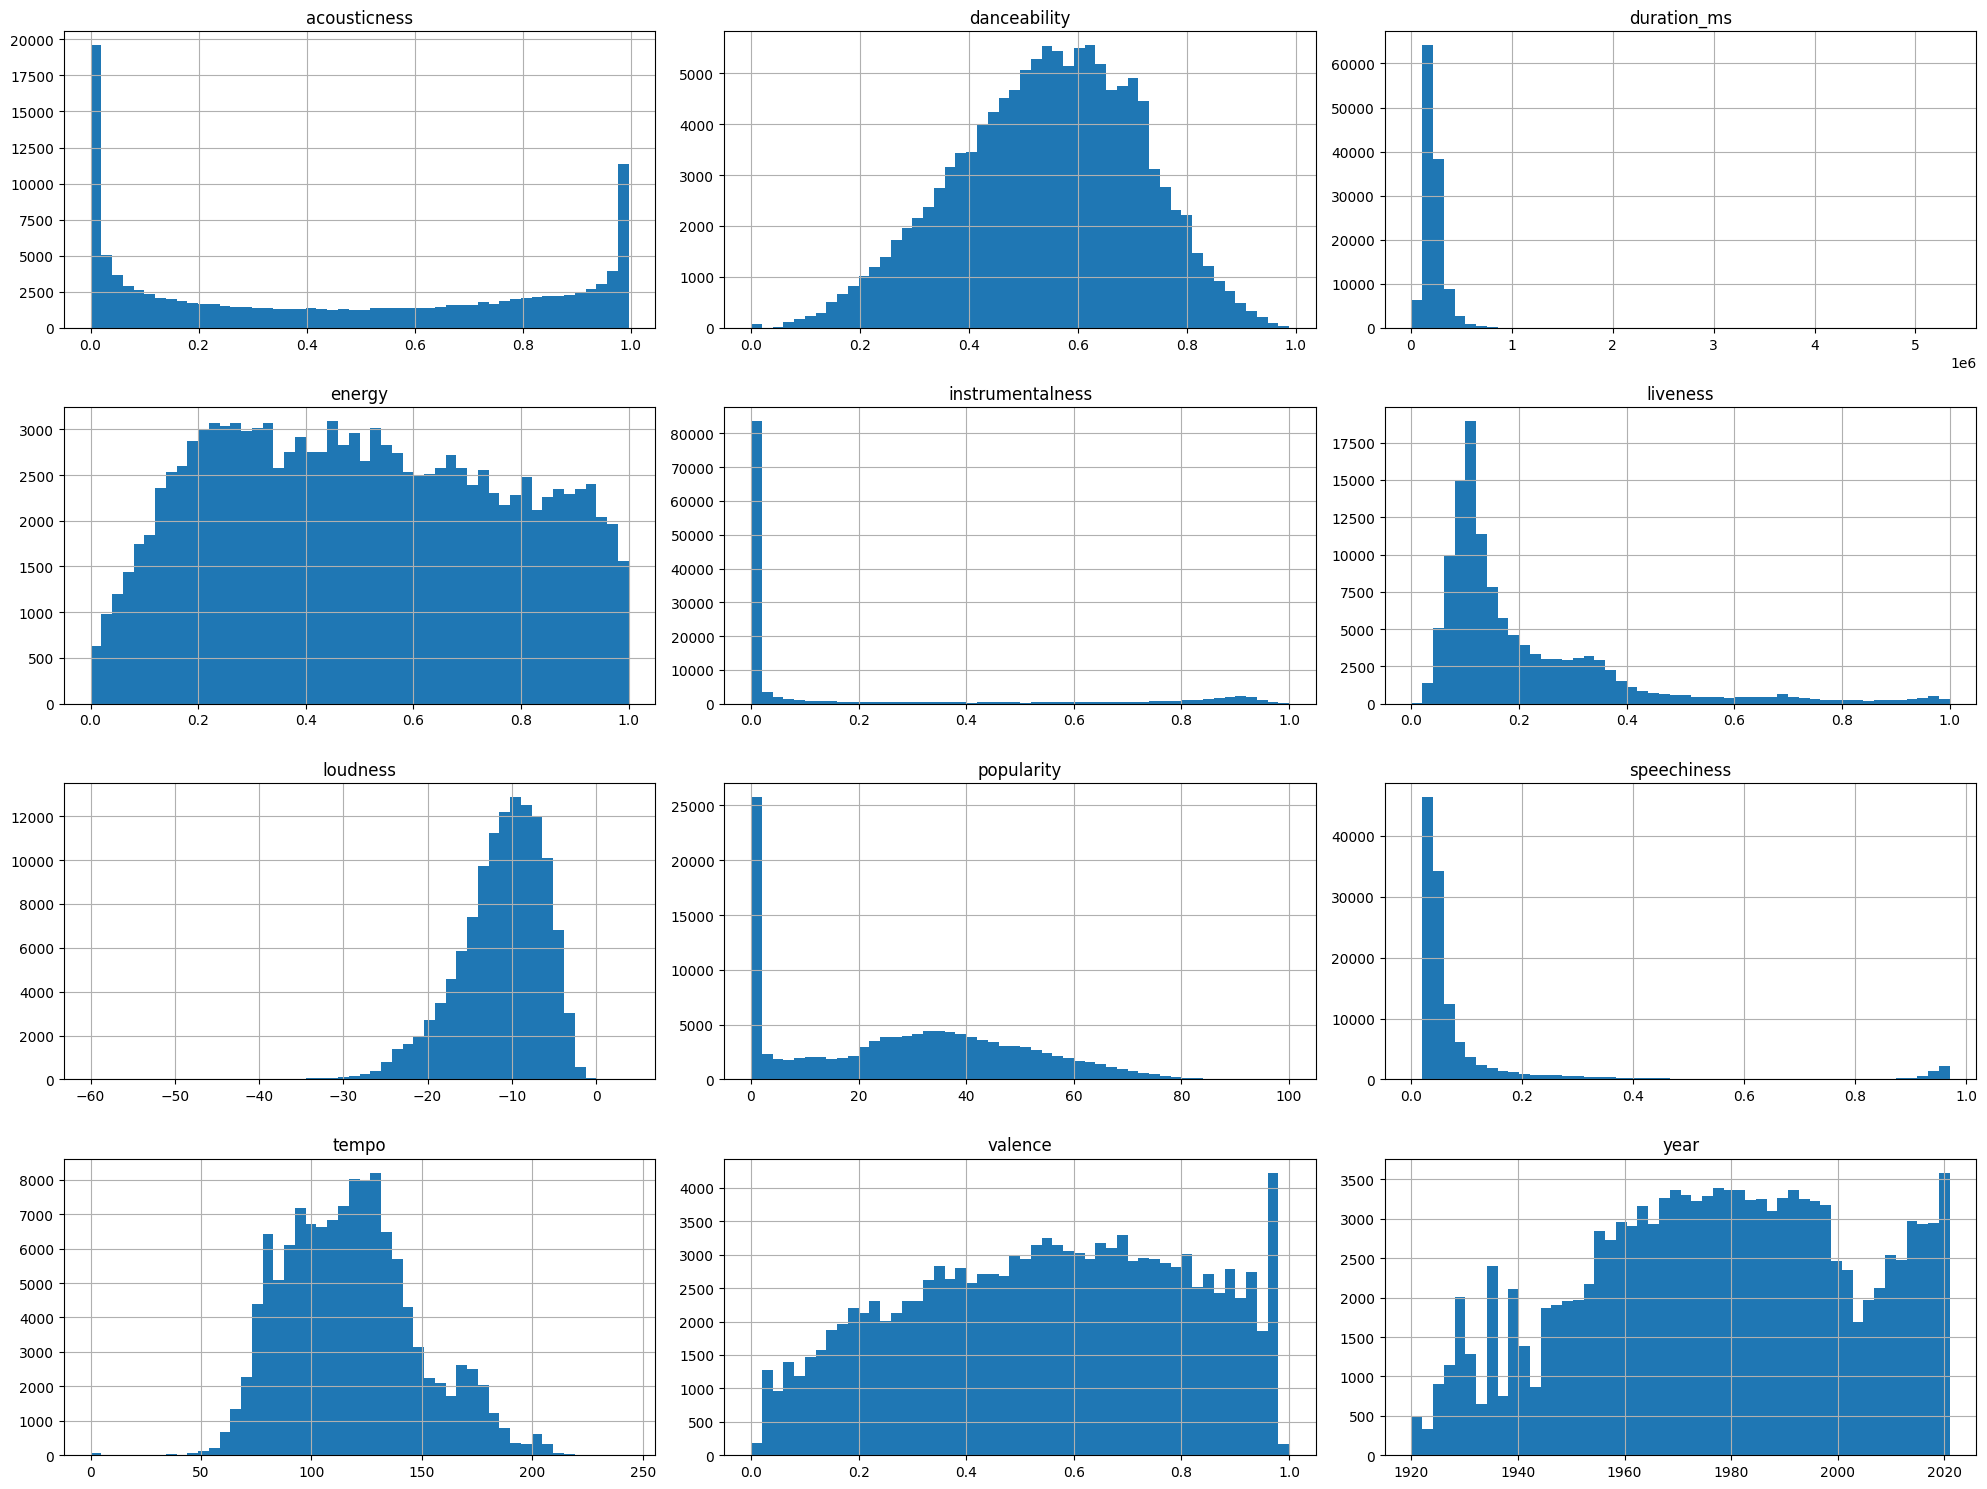

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# Crear un histograma para cada variable en df_alt

# Aplicar transformación logarítmica a las columnas especificadas
"""
cols_to_transform = ['acousticness', 'instrumentalness', 'liveness', 'speechiness']
df_alt[cols_to_transform] = df_alt[cols_to_transform].apply(lambda x: np.log1p(x))
df_alt.rename(columns={col: f"{col}_log" for col in cols_to_transform}, inplace=True)
"""
# Crear un histograma para cada variable transformada en df_alt
df_alt.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [15]:
import numpy as np

import matplotlib.pyplot as plt

# Crear un nuevo dataframe con la transformación aplicada
df_transformed = df_completo_cat.copy()

# Filtrar los valores de tempo que tienen un valor menor que 10
filtered_tempo = df_transformed[df_transformed['tempo'] < 10]

# Crear un nuevo dataframe con las canciones filtradas
dataframe_tempos = filtered_tempo[['name', 'tempo']]

# Ver el recuento y los nombres de dichas canciones
tempo_count = filtered_tempo.shape[0]

print(f"Recuento de canciones con tempo menor que 10: {tempo_count}")
print("Dataframe de las canciones:")
print(dataframe_tempos[dataframe_tempos['name'].str.contains("sonic", case=False, na=False)])


Recuento de canciones con tempo menor que 10: 80
Dataframe de las canciones:
                                                    name   tempo
14834  Sonic the Hedgehog Title Screen (From "Sonic t... 0.00000


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year
0,0.99100,0.59800,168333,0.22400,0.00052,0.37900,-12.62800,12,0.09360,149.97600,0.63400,1920
1,0.99300,0.64700,163827,0.18600,0.00002,0.51900,-12.09800,4,0.17400,97.60000,0.68900,1920
2,0.00017,0.73000,422087,0.79800,0.80100,0.12800,-7.31100,17,0.04250,127.99700,0.04220,1920
3,0.29500,0.70400,165224,0.70700,0.00025,0.40200,-6.03600,2,0.07680,122.07600,0.29900,1920
4,0.99600,0.42400,198627,0.24500,0.79900,0.23500,-11.47000,9,0.03970,103.87000,0.47700,1920
...,...,...,...,...,...,...,...,...,...,...,...,...
122216,0.00984,0.53000,253840,0.75900,0.00000,0.31900,-7.06700,69,0.03510,131.99900,0.50200,2021
122217,0.71500,0.73400,43320,0.34600,0.00000,0.39400,-11.72200,59,0.35500,88.84900,0.93000,2021
122218,0.00003,0.53000,292427,0.95900,0.02730,0.35500,-5.64800,0,0.14400,173.00900,0.26200,2021
122219,0.10500,0.78100,172720,0.48700,0.00000,0.08020,-7.30100,61,0.16700,129.94100,0.32700,2021


0        0.02285
1        0.00420
2        1.10840
3        0.01569
4        1.10590
           ...  
122216   0.00000
122217   0.00000
122218   0.16599
122219   0.00000
122220   0.00000
Name: instrumentalness_transformed, Length: 122221, dtype: float64

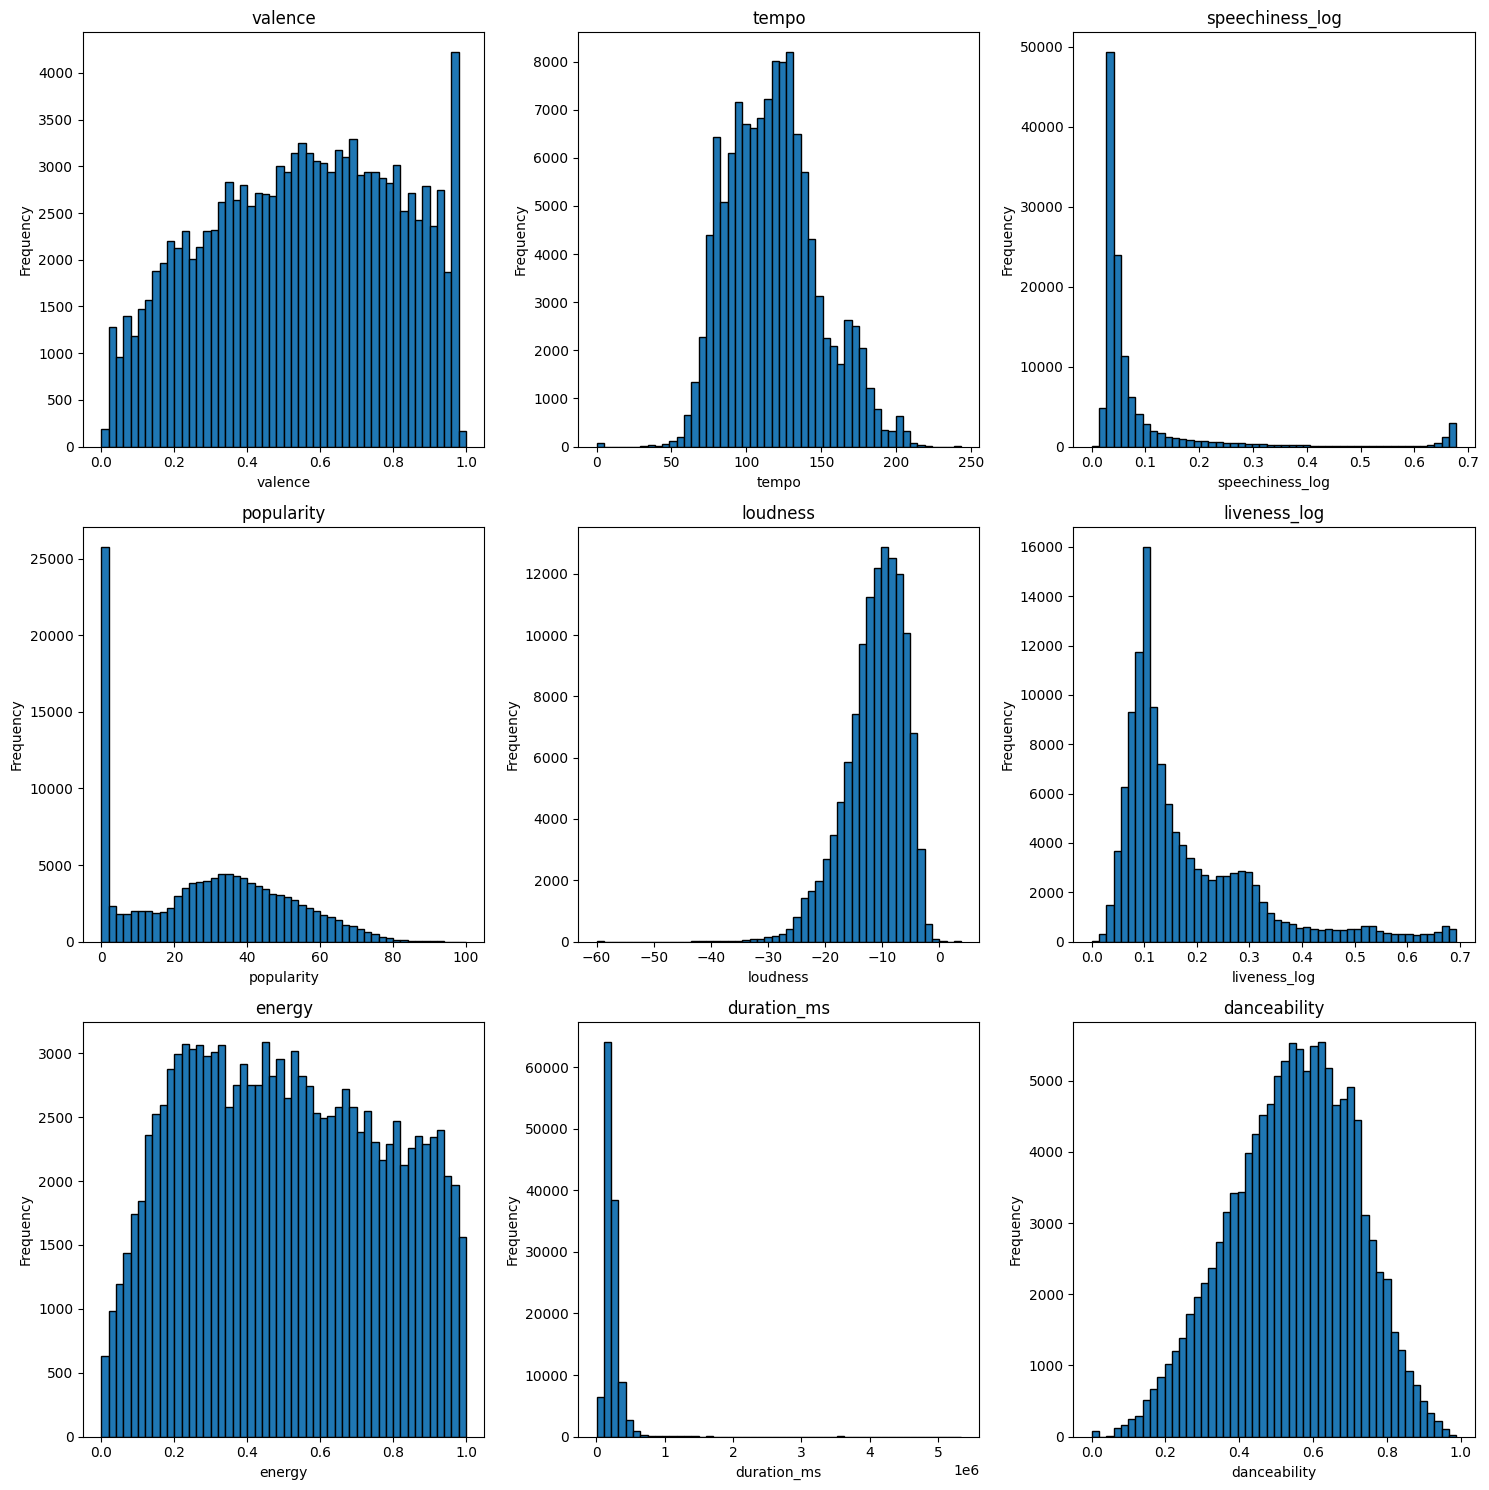

In [17]:
import matplotlib.pyplot as plt

# Lista de columnas a graficar
columns_to_plot = ['valence', 'tempo', 'speechiness_log', 'popularity', 'loudness', 'liveness_log', 'energy', 'duration_ms', 'danceability']

# Crear una figura y ejes
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterar sobre las columnas y los ejes para crear los histogramas
for ax, col in zip(axes.flatten(), columns_to_plot):
    df_alt[col].plot(kind='hist', bins=50, ax=ax, title=col, edgecolor='black')
    ax.set_xlabel(col)

# Ajustar el layout
plt.tight_layout()
plt.show()

In [12]:
# Filtrar las filas cuyo liveness estandarizado es mayor que 3
speechiness_rows = df_alt[df_alt['speechiness'] > 4]
# Mostrar las filas filtradas
# Obtener los índices de high_liveness_rows
indices_speechiness_rows = speechiness_rows.index

# Filtrar el dataframe original para obtener los nombres de las canciones
song_names = df_completo_cat.loc[indices_speechiness_rows, 'name']
speechiness_value = df_completo_cat.loc[indices_speechiness_rows, 'speechiness']
# Mostrar los nombres de las canciones
# Filtrar las filas que no contienen las palabras "capitulo", "chapter" y "Часть"
filtered_song_names = song_names[song_names.str.contains("capítulo|chapter|Часть|kapitel", case=False, na=False)]
filtered_speechiness_value = speechiness_value[filtered_song_names.index]

# Crear el dataframe con las canciones filtradas
df_high_speechiness_songs = pd.DataFrame({'song_name': filtered_song_names, 'speechiness': filtered_speechiness_value})

df_high_speechiness_songs



KeyError: 'speechiness'

In [41]:
# Obtener los índices de las canciones en df_high_speechiness_songs
indices_to_remove = df_high_speechiness_songs.index

# Eliminar las filas de df_alt con los índices obtenidos
df_alt = df_alt.drop(indices_to_remove)

df_alt = pd.DataFrame(scaler.fit_transform(df_alt[numeric_cols]), columns=numeric_cols)

# Mostrar el dataframe escalado
pd.options.display.float_format = '{:.5f}'.format
df_alt.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year
count,117997.00000,117997.00000,117997.00000,117997.00000,117997.00000,117997.00000,117997.00000,117997.00000,117997.00000,117997.00000,117997.00000,117997.00000
mean,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-1.24780,-3.20745,-1.57200,-1.95918,-0.54442,-1.14755,-9.98393,-1.38665,-0.73868,-3.92024,-2.10120,-2.41358
25%,-1.05842,-0.68158,-0.42371,-0.82191,-0.54442,-0.61079,-0.55650,-0.91141,-0.40820,-0.75580,-0.80035,-0.73388
50%,-0.06146,0.04349,-0.16875,-0.02696,-0.54317,-0.40739,0.12748,0.03906,-0.31586,-0.04690,0.04252,0.04451
75%,1.01460,0.71507,0.21950,0.82124,-0.13828,0.31084,0.73456,0.75192,-0.07481,0.58910,0.84305,0.78194
max,1.43157,2.66444,35.46286,1.84441,2.65357,4.33511,3.00704,3.36572,8.66038,4.13718,1.74749,1.72421


In [ ]:
# Filtrar las filas cuyo liveness estandarizado es mayor que 3
speechiness_rows = df_alt[df_alt['loudness'] < -4]
# Mostrar las filas filtradas
# Obtener los índices de high_liveness_rows
indices_speechiness_rows = speechiness_rows.index

# Filtrar el dataframe original para obtener los nombres de las canciones
song_names = df_completo_cat.loc[indices_speechiness_rows, 'name']
loudness_value = df_completo_cat.loc[indices_speechiness_rows, 'loudness']
artists_names = df_completo_cat.loc[indices_speechiness_rows, 'artists']

# Crear el dataframe con las canciones filtradas
df_loud = pd.DataFrame({'song_name': song_names, 'artists': artists_names, 'loudness': loudness_value})

# Obtener el índice de la fila con el valor mínimo de loudness
# Obtener las 5 canciones con los valores más bajos de loudness
lowest_loudness_songs = df_loud.nsmallest(5, 'loudness')
lowest_loudness_songs



# Filtrar las filas cuyo liveness estandarizado es mayor que 3
speechiness_rows = df_alt[df_alt['speechiness'] > 4]
# Mostrar las filas filtradas
# Obtener los índices de high_liveness_rows
indices_speechiness_rows = speechiness_rows.index
# Filtrar el dataframe original para obtener los nombres de las canciones
song_names = df_aux2.loc[indices_speechiness_rows, 'name']
speechiness_value = df_aux2.loc[indices_speechiness_rows, 'speechiness']
# Mostrar los nombres de las canciones


filtered_song_names = song_names[~song_names.str.contains("pt|jfl|skit|speech|story|announcement|récital|acte|monologue|commentary|chat|lecture|part|catalunya|radio drama|capítulo|chapter|Часть|kapitel|interview", case=False, na=False)]
quitar = speechiness_value[filtered_song_names.index]

# Crear el dataframe con las canciones filtradas
df_high_speechiness_songs = pd.DataFrame({'song_name': filtered_song_names, 'speechiness': filtered_speechiness_value})

# Obtener los índices de las canciones en df_high_speechiness_songs
indices_to_remove = df_high_speechiness_songs.index

# Eliminar las filas de speechiness_rows con los índices obtenidos
speechiness_rows = speechiness_rows.drop(indices_to_remove)

for name in filtered_song_names:
    print(name)

print(len(filtered_song_names))

,song_name,artists,loudness
40670,Key,C418,-41.76600
189,Raja Manggala,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,-37.31100
115,Ravel Ravel (Live),Gustavo Obligado,-36.31500
77,Descuernacabras (Live),Gustavo Obligado,-33.18700
212,Tedhak Saking,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,-32.95900


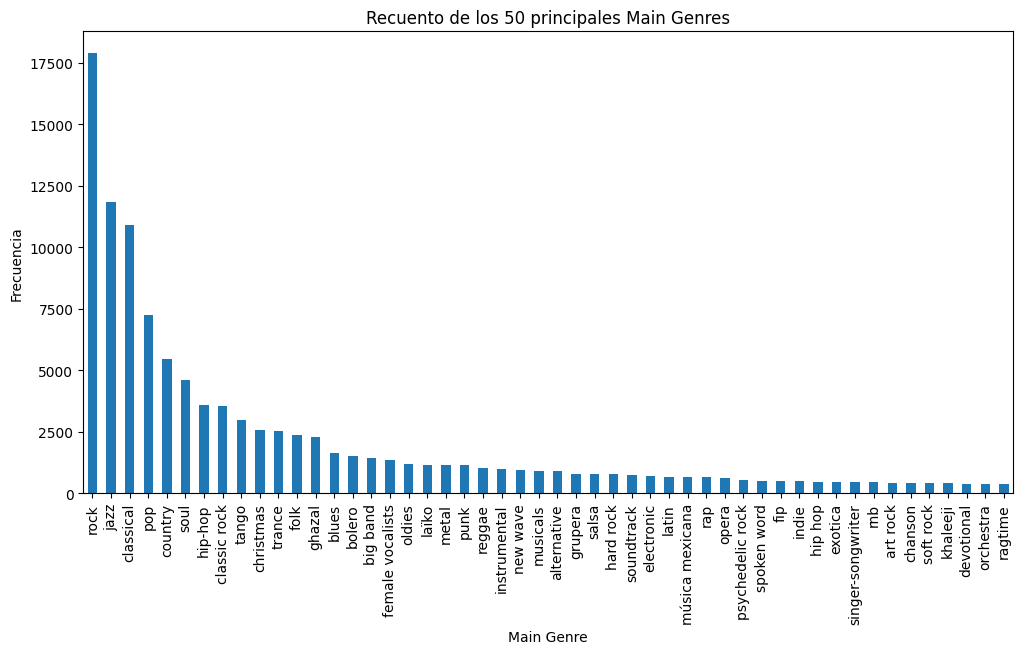

In [35]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada main_genre
main_genre_counts = df_completo_num['main_genre'].value_counts()

# Quedarse solo con los 100 principales main_genres
top_50_main_genres = main_genre_counts.head(51)
top_50_main_genres = top_50_main_genres[1:] # quitar unknown
# Crear el histograma
plt.figure(figsize=(12, 6))
top_50_main_genres.plot(kind='bar')
plt.title('Recuento de los 50 principales Main Genres')
plt.xlabel('Main Genre')
plt.ylabel('Frecuencia')
plt.show()

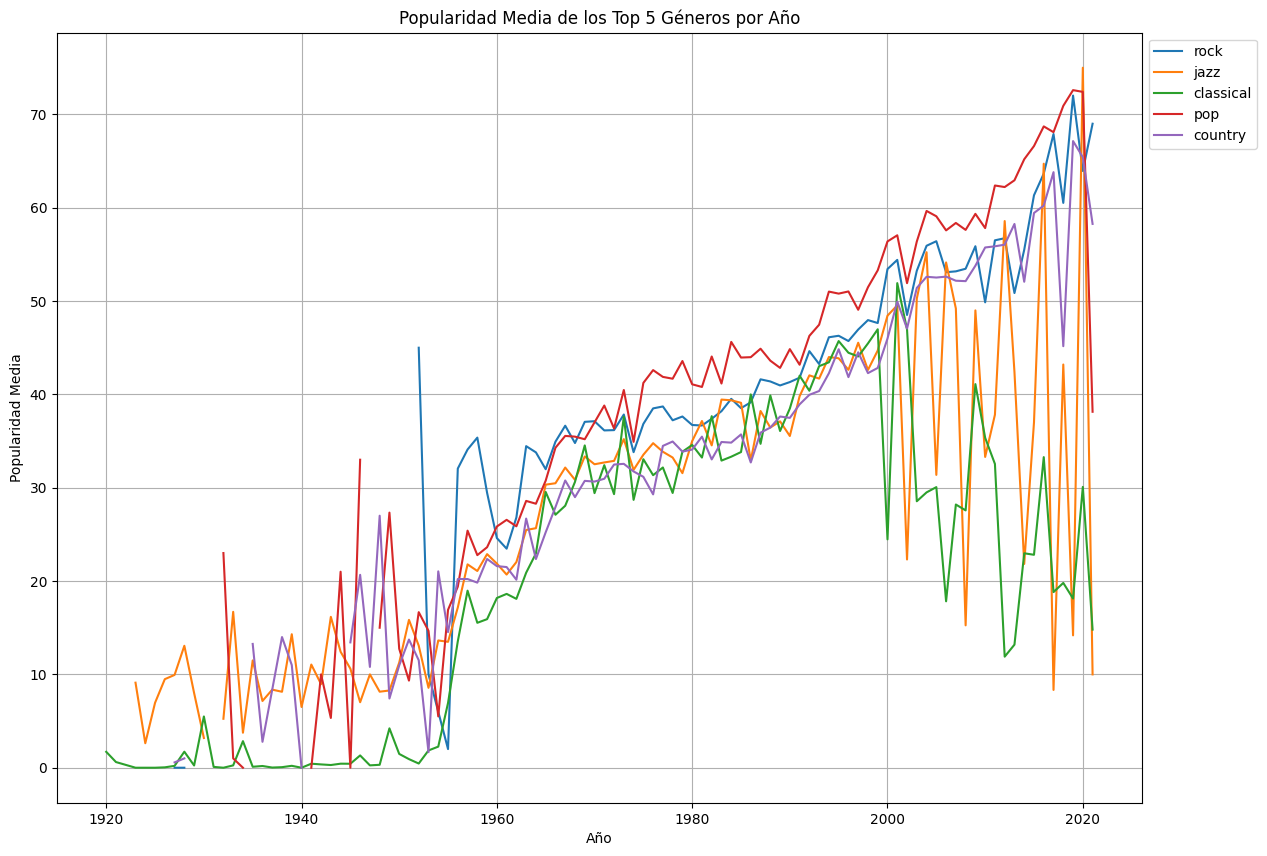

In [36]:
import matplotlib.pyplot as plt

# Filtrar los datos para los top 50 géneros
top_5_genres = top_50_main_genres.head(5).index.tolist()
df_top_5 = df_completo_num[df_completo_num['main_genre'].isin(top_5_genres)]

# Calcular la popularidad media por género y año
popularity_by_genre_year = df_top_5.groupby(['main_genre', 'year'])['popularity'].mean().unstack()

# Crear las gráficas de líneas de tendencia
plt.figure(figsize=(14, 10))
for genre in top_5_genres:
    if genre in popularity_by_genre_year.index:
        plt.plot(popularity_by_genre_year.columns, popularity_by_genre_year.loc[genre], label=genre)

plt.title('Popularidad Media de los Top 5 Géneros por Año')
plt.xlabel('Año')
plt.ylabel('Popularidad Media')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
missing_main_genre = df_completo_final['main_genre'].isnull().sum()
print(f"Number of missing values in 'main_genre': {missing_main_genre}")
unique_main_genres = df_completo_final['main_genre'].unique()
print("Possible values for 'main_genre':")
print(np.sort(unique_main_genres))

Number of missing values in 'main_genre': 0
Possible values for 'main_genre':
['acid jazz' 'acid rock' 'acoustic' 'adult contemporary' 'adult standards'
 'african' 'afrobeat' 'album rock' 'allboutguitar' 'alt country'
 'alt-country' 'alternative' 'alternative dance' 'alternative hip hop'
 'alternative metal' 'alternative rnb' 'alternative rock' 'ambient'
 'american' 'americana' 'anime' 'aor' 'arena rock' 'art pop' 'art rock'
 'australian' 'avant-garde' 'awesome' 'bachata' 'baladas' 'ballad' 'banda'
 'banjo' 'banned' 'baroque' 'baroque pop' 'bass' 'beach' 'beautiful'
 'bebop' 'bedroom pop' 'best' 'bhajan' 'big band' 'black metal'
 'blue-eyed soul' 'bluegrass' 'blues' 'blues rock' 'bolero' 'boleros'
 'bollywood' 'boogie-woogie' 'boom bap' 'bop' 'bossa nova' 'brasil'
 'brazil' 'brazilian' 'breakbeat' 'british' 'britpop' 'broadway' 'c-pop'
 'calm' 'calypso' 'canadian' 'cantopop' 'catchy' 'ccm' 'celtic'
 'cha cha cha' 'chamber pop' 'chanson' 'chanson francaise'
 'chanson française' 'chicago

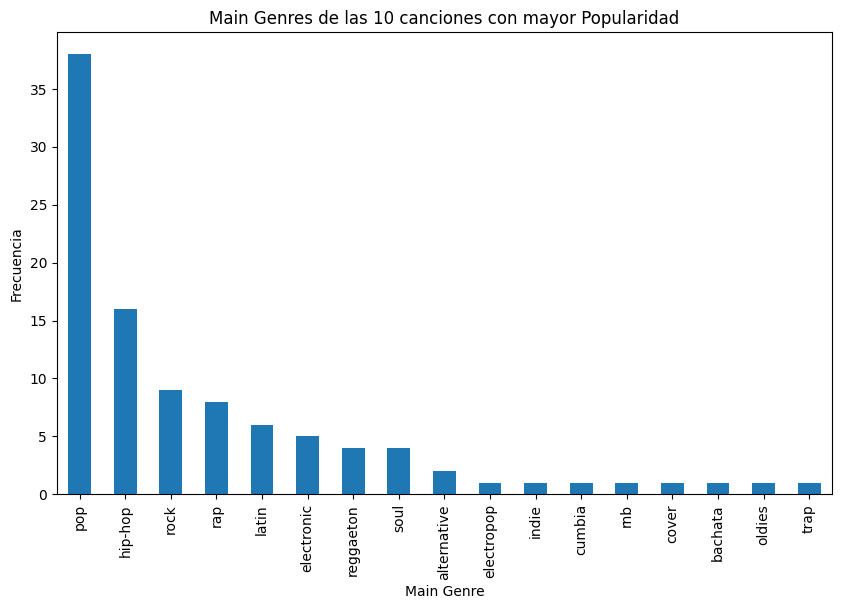

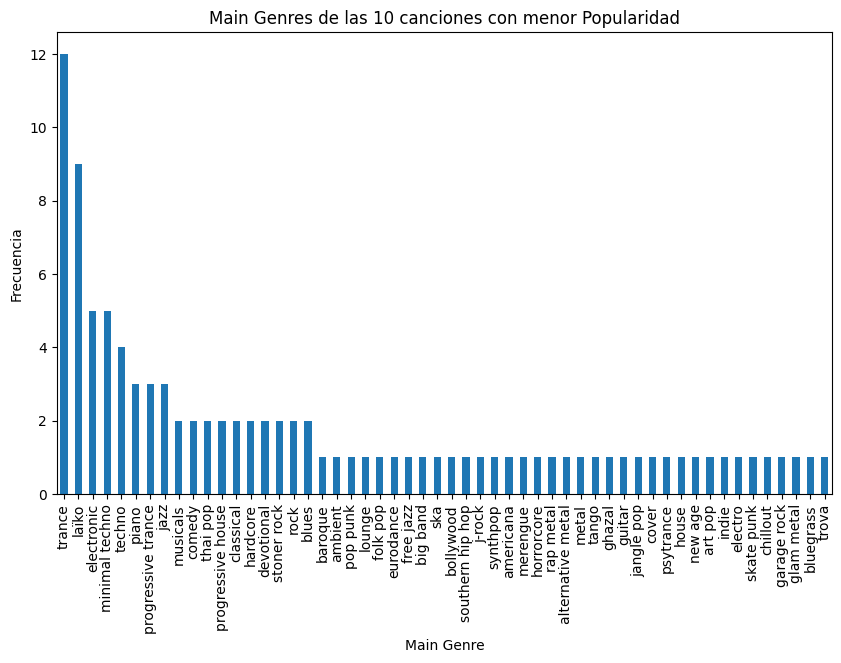

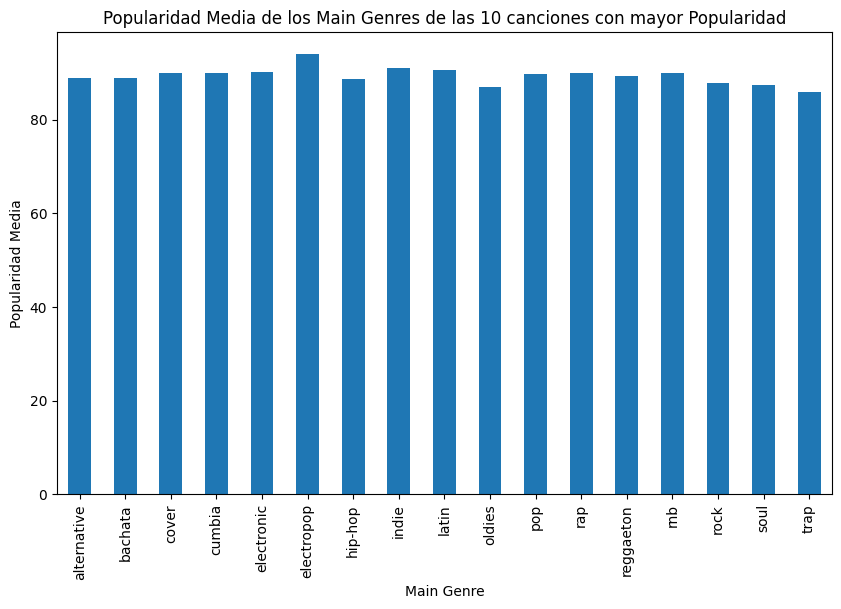

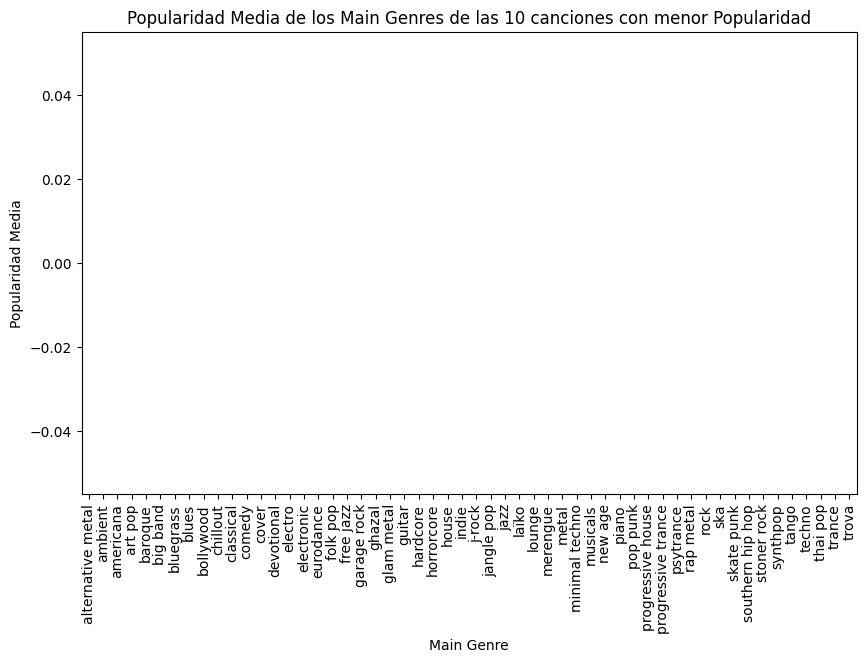

In [8]:
import matplotlib.pyplot as plt

df_auxiliar = df_completo_final[df_completo_final['main_genre'] != 'unknown']

# Obtener las 10 filas con mayor popularity
top_10_popular = df_auxiliar.nlargest(100, 'popularity')

# Obtener las 10 filas con menor popularity
bottom_10_popular = df_auxiliar.nsmallest(100, 'popularity')

# Concatenar ambos dataframes
main_genre_counts_top_bottom_2 = bottom_10_popular['main_genre'].value_counts()

# Contar la frecuencia de cada main_genre en el dataframe concatenado
main_genre_counts_top_bottom = top_10_popular['main_genre'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
main_genre_counts_top_bottom.plot(kind='bar')
plt.title('Main Genres de las 10 canciones con mayor Popularidad')
plt.xlabel('Main Genre')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
main_genre_counts_top_bottom_2.plot(kind='bar')
plt.title('Main Genres de las 10 canciones con menor Popularidad')
plt.xlabel('Main Genre')
plt.ylabel('Frecuencia')
plt.show()

# Calcular la popularidad media de cada main_genre en el dataframe concatenado
# Calcular la popularidad media de cada main_genre en el dataframe top_10_popular
mean_popularity_by_genre_top = top_10_popular.groupby('main_genre')['popularity'].mean()

# Calcular la popularidad media de cada main_genre en el dataframe bottom_10_popular
mean_popularity_by_genre_bottom = bottom_10_popular.groupby('main_genre')['popularity'].mean()

# Crear el gráfico de barras para la popularidad media del top
plt.figure(figsize=(10, 6))
mean_popularity_by_genre_top.plot(kind='bar')
plt.title('Popularidad Media de los Main Genres de las 10 canciones con mayor Popularidad')
plt.xlabel('Main Genre')
plt.ylabel('Popularidad Media')
plt.show()

# Crear el gráfico de barras para la popularidad media del bottom
plt.figure(figsize=(10, 6))
mean_popularity_by_genre_bottom.plot(kind='bar')
plt.title('Popularidad Media de los Main Genres de las 10 canciones con menor Popularidad')
plt.xlabel('Main Genre')
plt.ylabel('Popularidad Media')
plt.show()

